In [33]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
DIR_PATH = 'C:/programmering/DTU/robobot/data/images'

In [42]:
files = os.listdir(DIR_PATH)

images = [cv2.imread(os.path.join(DIR_PATH, f)) for f in files]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]

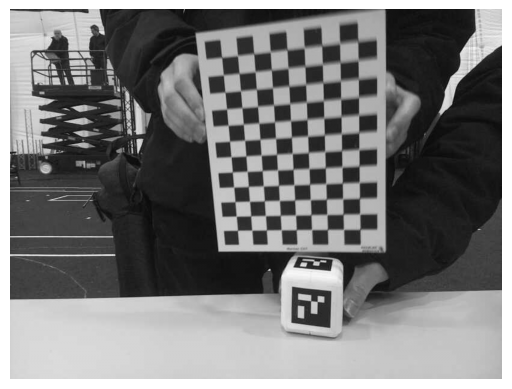

In [ ]:
i = np.random.randint(0, len(images))
plt.imshow(images[i], cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

array([[ 48,  48,  48, ..., 190, 192, 194],
       [ 50,  50,  50, ..., 198, 199, 199],
       [ 44,  44,  44, ..., 201, 200, 200],
       ...,
       [199, 199, 200, ..., 178, 178, 178],
       [199, 199, 200, ..., 176, 176, 176],
       [199, 199, 200, ..., 176, 176, 176]], shape=(616, 820), dtype=uint8)

In [52]:
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_100)
parameters = cv2.aruco.DetectorParameters()

# Create the ArUco detector
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
# Detect the markers
corners, ids, rejected = detector.detectMarkers(images[14])

print("Detected markers:", ids)
if ids is not None:
    cv2.aruco.drawDetectedMarkers(images[14], corners, ids)
    cv2.imshow('Detected Markers', images[14])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Detected markers: [[20]
 [20]]


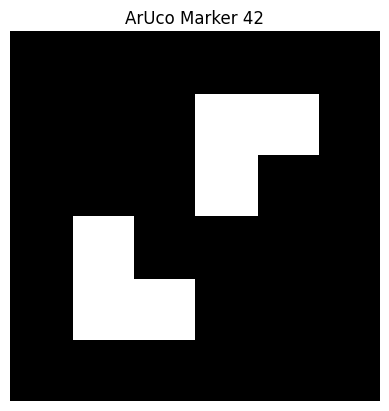